<a href="https://colab.research.google.com/github/DanielOMartins/Estudos/blob/master/IA_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3 inteligência Artificial - Regressão Linear



*   Agatha Gonçalves da Silva - RA: 125111362109
*   Matheus Boaventura Prieto - RA: 125111349867
*   João Vitor Ramos - RA: 125111378528
*   Matheus Xavier de Oliveira - RA: 125111375277
*   Patrick Oliveira dos Reis - RA: 125111356729
*   Daniel de Oliveira Martins - RA: 125111363707

## História da regressão linear

Tendo início entre os anos 1822-1911 pelo antropólogo, matemático e estatístico Francis Galton, primo de Charles Darwim. Mediante ao livro “A origem das espécies” começou a acreditar que os seres humanos herdaram características dos seus antecedentes e descobriu que a altura do filho tendia a ser mais próxima da altura média geral de todas as pessoas. Porém, somente no ano de 1875 que foi elaborada uma atividade para uma turma do ensino médio utilizando planilhas eletrônicas e recriando alguns experimentos de Galton, despertando assim um grande interesse sobre esse estudo matemático, estimulando a criatividade dos alunos e a realização das tarefas, hoje a regressão linear é utilizada basicamente quando é desejado realizar projeções e estudar um tipo de relação entre duas variáveis. muitas vezes não poderemos estimar um certo modelo de regressão linear.

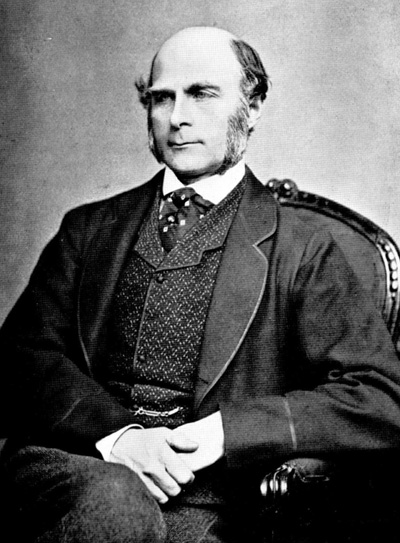

## Funcionamento do algoritmo

Como funciona a regressão linear ?

Utilizada para descrever a relação linear entre duas ou mais variáveis, ela se torna útil em algumas circunstâncias, como quando precisamos verificar o valor da alterção de uma variavel pela outra e se as duas tem realmente uma relação. 



Formulas

 y = b0 + b1.X1  (regressão simples)
 y = b0 + b1.X1 + b2.X2 (regressão multipla)


Na fórmula, o valor B0 será sempre constante, sem a influência de outro coeficiente. É chamado, portanto, de coeficiente linear. Já o "B1" é sempre multiplicado pelo ponto X, sendo alterado de acordo com este ponto. Desta forma, é considerado o coeficiente angular.

Essa estrutura permite que vários pontos diferentes sejam utilizados, mas sempre formando uma reta entre si, conforme aplicados em um gráfico. .

Y - variavel dependente ou prevista
x - variavel independente 
b0 - coeficiente que intecepta ou corta o eixo X 
b1 - coeficiente que define a inclinação da reta








## Características

* Coluna destino: É a variável que queremos prever.

* Colunas preditoras: Aqui temos a variável X, são valores de interesse, que devem ser numéricos, e baseado neles vamos entender sua influência em Y para predizer quais são seus possíveis futuros valores.

* Dividir os dados entre treinamento e teste, a proporção que usamos de 20% para teste e 80% para treinamento do algoritmo é considerado ideal.

* Com tudo isso feito podemos obter o coeficiente de como X influencia em Y, já conseguimos fazer também as previsões e obter algumas métricas importantes para avaliar se o nosso modelo de regressão é confiável ou não.


## Problemas que podem ser resolvidos

A regressão linear é uma técnica estatística muito poderosa e pode ser usada para analisar a eficácia do marketing, preços e promoções nas vendas de um produto. 

Por exemplo, se a empresa XYZ quiser saber se os fundos que ela investiu no marketing de uma determinada marca deu a ela um retorno substancial sobre o investimento, ela pode usar a regressão linear. A bom da regressão linear é que ela nos permite capturar os impactos isolados de cada uma das campanhas de marketing, além de controlar os fatores que podem influenciar as vendas. Em cenários da vida real, existem várias campanhas publicitárias executadas durante o mesmo período de tempo. Supondo que duas campanhas sejam veiculadas na TV e no rádio em paralelo, uma regressão linear pode capturar o impacto isolado e combinado da exibição desses anúncios juntos.

A regressão linear também pode ser usada para avaliar o risco em serviços financeiros ou domínio de seguros. Por exemplo, uma seguradora de automóveis pode realizar uma regressão linear para obter uma tabela de prêmio sugerida usando a proporção de sinistros previstos para o valor declarado do segurado. O risco pode ser avaliado com base nos atributos do carro, informações do motorista ou dados demográficos. Os resultados de tal análise podem orientar importantes decisões de negócios.



# Implementação do código

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

from google.colab import drive
import os

#drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks")

allMoviesFile = os.path.join("movies.csv")

print(allMoviesFile)

movies.csv


In [ ]:
movies_df = pd.read_csv(allMoviesFile)
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


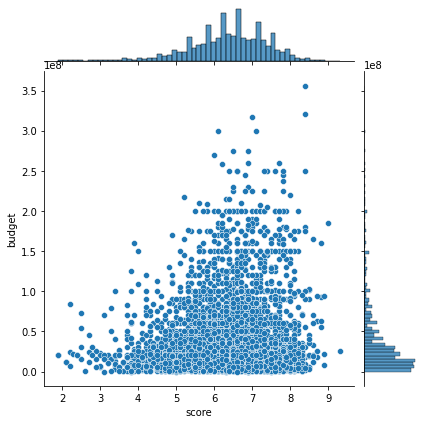

In [ ]:
sns.jointplot(x='score',y='budget',data=movies_df)

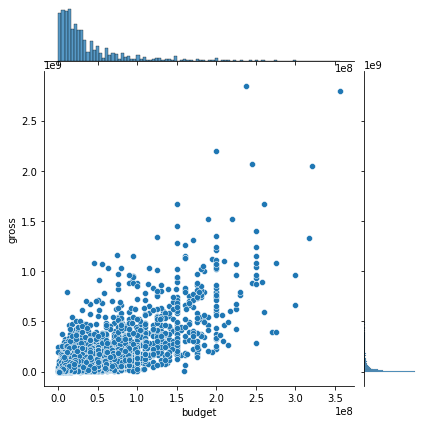

In [ ]:
sns.jointplot(x='budget',y='gross', kind="reg",data=movies_df)

In [ ]:
movies_df=movies_df.dropna(axis=0)

# Reset index after drop
movies_df=movies_df.dropna().reset_index(drop=True)

In [ ]:
X = movies_df[['votes','budget', 'gross', 'runtime']]
y = movies_df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)
lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.intercept_)

4.462915211805808


O valor **intercept** é quando todos os valores que definimos nas colunas preditoras estão em 0. Significa que se todos os valores estiverem zerados, ainda podemos obter uma pontuação de 4,5.

O que não faz muito sentido, pois se não tivermos votos ou um filme de 0 minutos, seria impossível se obter qualquer valor como nota.



In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
votes,2.285745e-06
budget,-6.391924e-09
gross,3.378907e-10
runtime,1.720832e-02


Analisando os coeficientes a cima, podemos concluir como coluna influência na pontuação.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Votes** está associado a um **aumento na pontuação de 2,2**.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Budget** está associado a um **diminuição na pontuação de 6,4**.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Gross** está associado a **aumento na pontuação de 3,3**.

*   Mantendo todos os outros parâmetros fixos, um aumento de 1 unidade na **Runtime** está associado a um **aumento na pontuação de 1,7**.


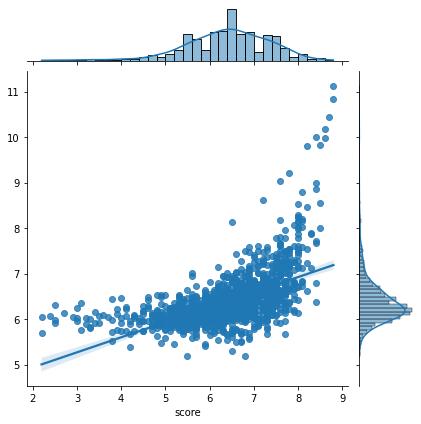

In [ ]:
predictions = lm.predict(X_test)

sns.jointplot(x=y_test,y=predictions, kind="reg")

A baixo temos métricas de loss function:

*   **MAE** é a média do valor absoluto dos erros
*   **MSE** é a média dos erros ao quadrado
*   **RMSE** é a raiz quadrada da média dos erros ao quadrado









In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  0.5762947474549113
MSE:  0.6070416388962212
RMSE:  0.7791287691365408


Quanto menor as métricas forem melhor o nosso modelo foi. De acordo com a métrica a cima podemos ver que nosso modelo foi bem, pois são métricas baixas.